Trabalho prático de Computação Gráfica 2025.1|C209-L1
Lilyan Oliveira - 301|GES

Descrição do projeto:
•	Analisem cuidadosamente as características visuais das imagens fornecidas. Os aluno devem utilizar as técnicas aprendidas em sala para operar as imagem fornecidas NESTA ESPECÍFICA ORDEM:
1.	Juntar todas as imagens em uma única
2.	Trocar as cores (mudar a cor dos pinguins para qualquer outra)
3.	Aplicar o espelhamento
4.	Recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem).
5.	Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold.  (Justifique a escolha do threshold)
6.	Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul)
•	Os itens devem ser resolvidos usando o resultado do anterior, por exemplo: a imagem resultado do item deve ser usada como base para o item 2.
•	Elaborem um plano detalhado descrevendo as etapas e técnicas que serão utilizadas para transformar a imagem inicial na imagem final. Considerem os conceitos e técnicas discutidos em sala de aula.


1.	Juntar todas as imagens em uma única

In [4]:
import cv2
import numpy as np

# Carregar as imagens
p1 = cv2.imread("P1.png")
p2 = cv2.imread("P2.png")
p3 = cv2.imread("P3.jpg")
p4 = cv2.imread("P4.png")

# Verificar se todas têm o mesmo tamanho (se não, redimensiona)
altura, largura = p1.shape[:2]
p2 = cv2.resize(p2, (largura, altura))
p3 = cv2.resize(p3, (largura, altura))
p4 = cv2.resize(p4, (largura, altura))

# Juntar as imagens em 2x2 (grid)
linha1 = np.hstack((p1, p2))
linha2 = np.hstack((p3, p4))
imagem_unida = np.vstack((linha1, linha2))

# Mostrar resultado (opcional)
cv2.imshow("Imagem Combinada", imagem_unida)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salvar resultado
cv2.imwrite("resultado_1_combinada.png", imagem_unida)


True

2.	Trocar as cores (mudar a cor dos pinguins para qualquer outra)

In [2]:
import cv2
import numpy as np

# Carrega imagem combinada
img = cv2.imread("resultado_1_combinada.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Copia da imagem para aplicar alterações
output = img.copy()

# === NOVAS FAIXAS REFINADAS ===

# Azul escuro (P1) — pegue só os tons saturados, evitando sombra azulada
mascara_azul = cv2.inRange(hsv, (105, 100, 50), (125, 255, 255))
output[mascara_azul > 0] = [128, 0, 128]  # roxo

# Cinza (P2) — tons neutros com baixa saturação, evitando sombra
mascara_cinza = cv2.inRange(hsv, (0, 0, 130), (180, 40, 230))
output[mascara_cinza > 0] = [180, 105, 255]  # rosa

# Azul claro (P3) — só azul mais vibrante
mascara_azul_claro = cv2.inRange(hsv, (90, 50, 200), (105, 255, 255))
output[mascara_azul_claro > 0] = [255, 0, 255]  # magenta claro

# Verde (P4)
mascara_verde = cv2.inRange(hsv, (50, 100, 100), (80, 255, 255))
output[mascara_verde > 0] = [255, 255, 0]  # ciano

# Amarelo (pés e bico) — evita sombras escuras
mascara_amarelo = cv2.inRange(hsv, (25, 150, 150), (35, 255, 255))
output[mascara_amarelo > 0] = [255, 0, 0]  # azul

# Branco (barriga) — somente branco puro, ignora sombras cinza
mascara_branco = cv2.inRange(hsv, (0, 0, 230), (180, 20, 255))
# Aqui deixamos como está ou podemos dar um tom azulado/pérola se quiser

# Exibir resultado final
cv2.imshow("Pinguins Refinados", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salvar imagem
cv2.imwrite("resultado_2_cores_refinadas.png", output)


True

3.	Aplicar o espelhamento

In [3]:
import cv2

# Carregar a imagem com as cores trocadas
img = cv2.imread("resultado_2_cores_refinadas.png")

# Espelhamento horizontal
espelhada = cv2.flip(img, 1)  # 1 = horizontal, 0 = vertical, -1 = ambos

# Mostrar imagem espelhada
cv2.imshow("Imagem Espelhada", espelhada)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salvar resultado
cv2.imwrite("resultado_3_espelhada.png", espelhada)


True

4.	Recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem).

In [4]:
import cv2

# Carregar imagem espelhada
img = cv2.imread("resultado_3_espelhada.png")

# Obter altura e largura da imagem
altura, largura = img.shape[:2]

# Metade da altura e largura
metade_altura = altura // 2
metade_largura = largura // 2

# Recortar quadrante superior direito (linha 0:metade_altura, colunas metade_largura:largura)
recorte_roxo = img[0:metade_altura, metade_largura:largura]

# Mostrar e salvar
cv2.imshow("Pinguim Roxo Simpático", recorte_roxo)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("resultado_4_pinguim_roxo.png", recorte_roxo)


True

5.	Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold.  (Justifique a escolha do threshold)

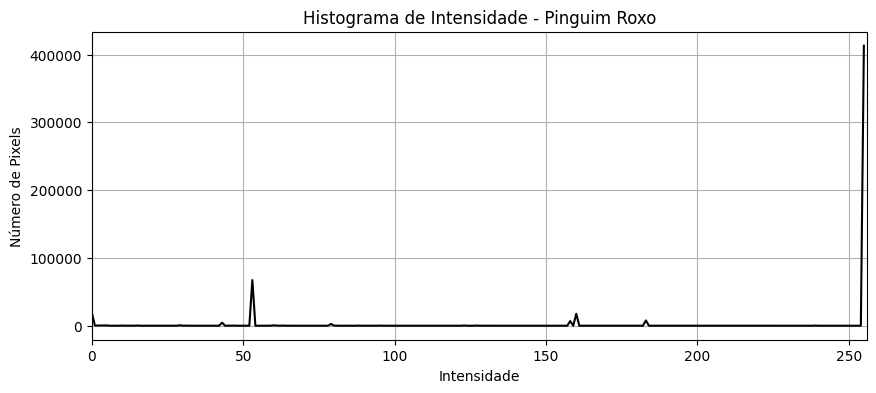

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar imagem recortada
img = cv2.imread("resultado_4_pinguim_roxo.png")

# Converter para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calcular histograma
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Plotar histograma
plt.figure(figsize=(10, 4))
plt.title("Histograma de Intensidade - Pinguim Roxo")
plt.xlabel("Intensidade")
plt.ylabel("Número de Pixels")
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.grid()
plt.show()


Escolhi o valor do limite 120 para estar entre dois picos diferentes no histograma (50–100 e 150–200). Isso permite segmentar a imagem separando bem as regiões mais escuras (como contornos e corpo) das mais claras (como a barriga), garantindo uma boa distinção visual.

6.	Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul)

In [6]:
import cv2
import numpy as np

# Carregar imagem do pinguim recortado
img = cv2.imread("resultado_4_pinguim_roxo.png")

# Converter pra tons de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold
limiar = 120
_, mask = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY_INV)

# Criar imagem da cor lavanda
lavanda = np.full(img.shape, (216, 191, 216), dtype=np.uint8)

# Aplicar a cor lavanda apenas nas áreas abaixo do threshold
resultado_final = img.copy()
resultado_final[mask > 0] = lavanda[mask > 0]

# Mostrar e salvar resultado
cv2.imshow("Pinguim Roxo Estilizado", resultado_final)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("resultado_5_threshold_lavanda.png", resultado_final)


True

Etapas e técnicas utilizadas

1. Juntar as imagens
Quatro imagens (P1, P2, P3 e P4), cada uma representando um pinguim com características visuais distintas. As imagens foram redimensionadas para uma resolução comum juntadas em uma única imagem, formando uma série 2x2 (mosaico).

2. Troca de cores
Cada pinguim teve suas cores originais remanescentes por cores alternativas com objetivo de destacar visualmente os elementos. Essa operação foi feita por meio de uma máscara baseada em intervalo de cor (filtro HSV), ajustando apenas as regiões específicas dos pinguins.

3. Espelhamento
A imagem composta foi espelhada horizontalmente (flip left-to-right).

4. Recorte do pinguim favorito
Após o espelhamento, foi selecionado o pinguim do quadrante superior direito (que passou a ser o pinguim roxo). Os demais quadrantes foram descartados, mantendo-se apenas a região correspondente ao pinguim escolhido.

5. Análise de histograma e escolha do limite
A imagem do pinguim foi convertida para escala de cinza e seu histograma foi detalhado. Foram identificados dois picos: um entre 50 e 100 (tons escuros) e outro entre 150 e 200 (tons claros).
Limiar escolhido: 120
Justificativa: O valor 120 está entre os dois picos, sendo ideal para separar visualmente áreas claras e escuras do pinguim.

6. Aplicação de cor personalizada
Todos os pixels com valor de intensidade ≤ 120 foram coloridos com o tom lavanda claro (RGB: 216, 191, 216).
